In [6]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('../cc.ko.300.bin')

for w, sim in m_fasttext.similar_by_word('파이썬', 10):
    print(f'{w}: {sim}')

NameError: name 'm_fasttext' is not defined

In [46]:

import fasttext
model = fasttext.load_model('../cc.ko.300.bin')


In [161]:
import pandas as pd
file = pd.read_csv("./ChatbotData.csv")


In [162]:
words = set()
for sentence in file['Q']:
    new_words = sentence.split(" ")
    words.update(set(new_words))
    

In [163]:
word_vectors = dict()
for word in words:
    try:
        vector = model.get_word_vector(word)
    except Exception:
        pass
    word_vectors[word] = vector

In [164]:
words

{'옷',
 '여자인지',
 '입어보는',
 '보내려',
 '떨린다.',
 '패턴',
 '누가?',
 '심각해요.',
 '지내는데',
 '보면',
 '필요없어',
 '아이디',
 '뭐있음?',
 '동성',
 '사이',
 '쎄',
 '첫만남',
 '받겠지?',
 '연애한지',
 '종이에',
 '빌려줘',
 '방구',
 '사랑했던걸',
 '결혼인거야?',
 '거라는데',
 '천일이네',
 '죽으란',
 '호감',
 '생각함?',
 '가끔',
 '나가고',
 '참는',
 '리턴',
 '하아',
 '없을거야.',
 '먹으니까',
 '명쯤',
 '돈이다.',
 '됐어',
 '형을',
 '오늘따라',
 '걔랑',
 '진짜',
 '인가보다.',
 '렌트',
 '좋을까',
 '피시방데이트도하고싶은데',
 '반장을',
 '재미가',
 '모쏠',
 '롯데월드',
 '마스크팩',
 '후회할까?',
 '사진',
 '이래도',
 '낼까?',
 '한쪽만',
 '바꿔야',
 '오늘이',
 '이유는',
 '대해.',
 '전여자친구',
 '이사하는',
 '후회인지',
 '뿌려도',
 '인터넷',
 '바라는게',
 '내려놓았더니.잊혀지려고는',
 '우울해.',
 '열흘짼데',
 '눈물만.',
 '자연스럽게',
 'jk김동욱',
 '애들이',
 '끝나요',
 '넘',
 '나왔대',
 '떠났습니다.',
 '주세요',
 '시누',
 '놀지',
 '이별만한',
 '보내',
 '을',
 '행복한거라더니.',
 '진료예약',
 '아무',
 '사흘.',
 '났어',
 '키스함.',
 '택배가',
 '톡',
 '아파라',
 '노답이네',
 '안들어간다고',
 '말해?',
 '중2병인거',
 '깨졌는데',
 '방들이',
 '대쉬해도',
 '따기',
 '썸을',
 '애는',
 '아니',
 '목소리라도',
 '그만두기',
 '그런거니?',
 '쳐다',
 '언젠간',
 '혼자만의',
 '불순',
 '눌러버렸어.',
 '인정해야할까?',
 '전공을',
 '설레발',
 '올랐어!',
 '자도',
 '같은',
 '수상

In [165]:
xys.shape

(14284, 2)

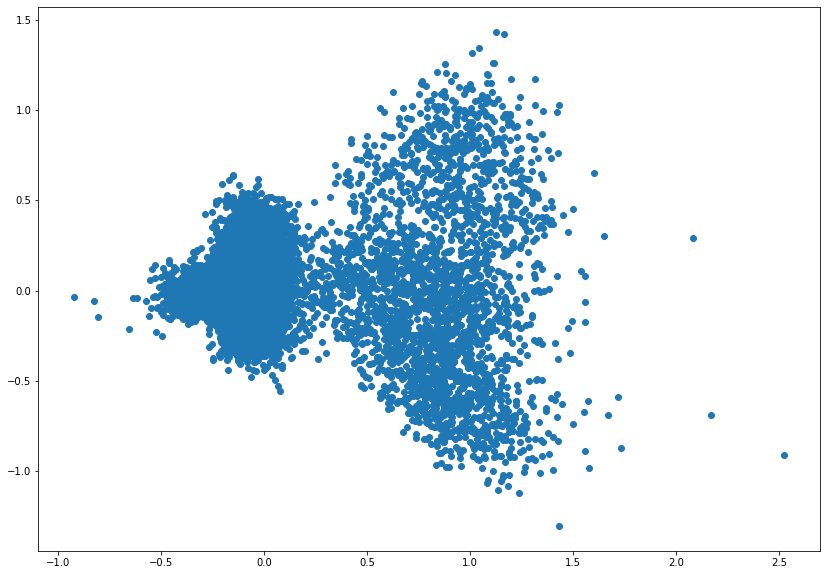

In [166]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
# matplotplib 폰트 설정을 안해서 그래프에서 한국어 라벨이 깨져서 아래 단어로 임시처리했습니다. ㅠ

words = list(words)
pca = PCA(n_components=2)
xys = pca.fit_transform([word_vectors[w] for w in words])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10))
plt.scatter(xs, ys, marker='o')
# for i, v in enumerate(word_labels):
#     plt.annotate(v, xy=(xs[i], ys[i]))

In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xys_norm = scaler.fit_transform(xys)

In [172]:
word_vectors = dict(zip(words, xys_norm.tolist()))

In [173]:
word_vectors

{'옷': [0.571937213682872, 0.2523554279914225],
 '여자인지': [0.23218183523408253, 0.47637535702999584],
 '입어보는': [0.2338553998632161, 0.4977966008071658],
 '보내려': [0.3050492556962256, 0.5917857754407913],
 '떨린다.': [0.18654032188399594, 0.44384061704622213],
 '패턴': [0.4939746604939732, 0.2802280162192683],
 '누가?': [0.19003917996678538, 0.46311889192224365],
 '심각해요.': [0.1877772652331024, 0.46534754049125776],
 '지내는데': [0.23302595171666635, 0.5142225063561688],
 '보면': [0.40963316888288803, 0.7710024101665559],
 '필요없어': [0.2243815643190288, 0.5164025312351244],
 '아이디': [0.2544963066040526, 0.3608103242960795],
 '뭐있음?': [0.18209088384589753, 0.46678939474932907],
 '동성': [0.5136623042633155, 0.1478246149735276],
 '사이': [0.4159138485846139, 0.4140518316073699],
 '쎄': [0.4817574051844837, 0.43340501510388835],
 '첫만남': [0.2595083447206041, 0.3907074003308709],
 '받겠지?': [0.19320645550751042, 0.45063632432137585],
 '연애한지': [0.18619732624847535, 0.45359553712264905],
 '종이에': [0.2047407218631928, 0.45

In [174]:
with open('word_vector.json', 'w', encoding='ascii') as json_file:
    json.dump(word_vector_json, json_file)